
# Project: Movie Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we'll be analyzing data associated with movies. This data set contains information
about 10,000 movies collected from The Movie Database(TMDb)
However, we'll answer 3 questions.
><ul><li>Does runtime affect the vote average the people give for the movie?</li>
><li>Are the number of the movie increase each year?</li> 
><li>Dose the revenues of the movie field increase each year?</li></ul>

#### Library imports

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


>#### Load data

In [65]:

df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


##### First we'll know how many columns and rows we have

In [66]:
df.shape

(10866, 21)

##### Now we look to the description to understand the dataset more by summary statistics

In [67]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### To find any missing values in the dataset

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Data Cleaning 


>##### First i will drop unnecessary columns based on my analysis

In [69]:
df.drop(['id', 'imdb_id', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'cast'], axis=1, inplace=True)

In [70]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


##### Histogram for all data

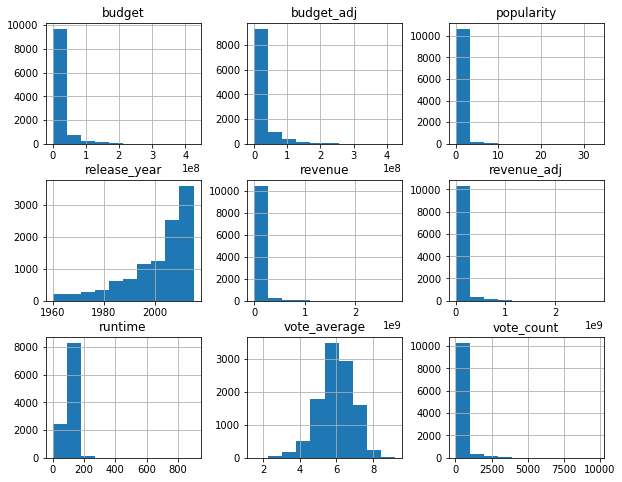

In [71]:
df.hist(figsize=(10, 8));

##### Fill null values

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10843 non-null  object 
 6   release_date    10866 non-null  object 
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   release_year    10866 non-null  int64  
 10  budget_adj      10866 non-null  float64
 11  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


##### After checking the null values there was 23 null in genres but I will not use this column so for my analysis it is not a necessity to solve this column

##### Next, I will check for any duplicated data 

In [73]:
df.duplicated().sum()

1

##### For this step I will use the loc to see the duplicate row and keep=False to show them both

In [74]:
df.loc[df.duplicated(keep=False), :]

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,0.59643,30000000,967000,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,0.59643,30000000,967000,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0


##### Drop the duplicate rows

In [75]:
df.drop_duplicates(inplace=True)

##### Check if it dropped by the using the sum

In [76]:
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis


#### Does runtime affect the vote_average the people give to the movie?

>##### First step, I will use compression to divide the run time into two groups.
><ul><li> The first one is mudim_time which is equal to or less than 135. </li>
><li> The second group is a long time where the runtime is more than 135.</ul></li>

In [77]:

midum_time = df[df['runtime'] <= 135 ]
long_time= df[df['runtime'] > 135 ]



##### Showing Midum_time and Long Time to the vote average

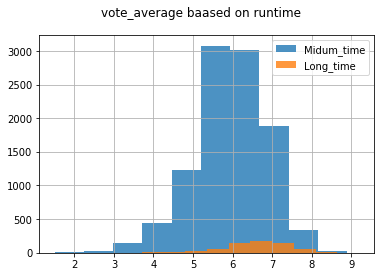

In [93]:

midum_time['vote_average'].hist(alpha=0.8, label = 'Midum_time');
long_time['vote_average'].hist(alpha=0.8, label = 'Long_time');
plt.legend();
plt.suptitle('vote_average baased on runtime');



>##### Let's start by Mudim_time, as we can see there is a large number of movies that have a Mudim runtime. However, the majority of the vote average in Mudim_time movies are between 5 to 7.2. On the other hand, the histogram shows us that a small number has a long runtime. The majority of the vote average for long movies is between 6 and 7.5. That indicates if the runtime of the movies is long they don't affect the vote_avrage the people give to the movies. so the movie vote average may be affected by the content or genes or even actors.

#### Are the number of the movie increase each year?


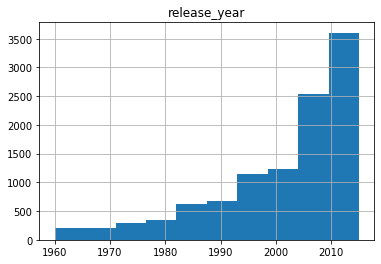

In [82]:
df.hist(column='release_year');

#### Dose the revunes of movies field incearse each year ?

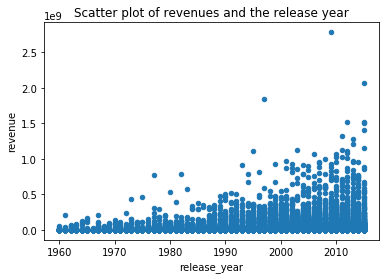

In [89]:
df.plot(x='release_year', y='revenue', kind='scatter', title='Scatter plot of revenues and the release year');

>##### We can recognize that the movies generating more revenue each year. as we can see start from the year 1990 the revenues highly increased. So that gives us an insight that the movie field is successful each year by generating more revenues.

<a id='conclusions'></a>
## Conclusions

> To sum up, the result we get from exploring the data 
><ol><li>The vote_average of the movies doesn't affect by there runtime and that is a good finding for the directors of the movies, who think long movies will get a lower vote.</li>
    <li>    The number of the movie increases each year which gives us that movies field are growing.</li>
><li> The movie industry is very successful, because movies generating higher revenues each year</ol></li>

#### Limitation of the project :
><ul><li>The project is for Udacity</li></ul>
><ul><li>The analysis used may be wrong or right it depends on the way of the analysis.</li></ul>

